# Pima Indian Dibetes - EDA & Prediction
![](https://ak5.picdn.net/shutterstock/videos/3538235/thumb/6.jpg)
Dataset Link:https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.



# Problem Statement

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

## Evaluation Criteria and loss functions
Here is the formula for accuracy and error rate.

![](https://miro.medium.com/max/976/1*iBz8CA_yKFx9KWcAF31WTA.png)

Here,the two-lettered alphabets are of course coming from the confusion matrix.

![](https://miro.medium.com/max/870/1*xUdrn7cQEWwFAH8L8ZTr-w.png)

Here is an outline of the project:

1. Download the dataset

2. Explore & analyze the dataset

3. Missing Value/Outlier Treatment

4. Prepare the dataset for ML training

5. Train hardcoded & baseline models

6. Make predictions

7. Train & evaluate different models

8. Tune hyperparametrs for the best models

9. Saving the best model

10. Document & publish the project online



#1. Downloading the Dataset

Steps:

- Install required libraries

- Importing the necessary libraries

- Download data from Kaggle

- Load dataset with Pandas

Dataset link : 'https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/download?datasetVersionNumber=1'

## Install Required Libraries

In [158]:
!pip install plotly  opendatasets catboost --upgrade --quiet

### Importing the necessary libraries

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgbm
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import opendatasets as od
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


### Download Data from Kaggle

We will use the opendatsets library: https://jovian.ai/outlink?url=https%3A%2F%2Fgithub.com%2FJovianML%2Fopendatasets

In [160]:
dataset_url = 'https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/download?datasetVersionNumber=1'

In [161]:
od.download(dataset_url)

Skipping, found downloaded files in "./pima-indians-diabetes-database" (use force=True to force download)


In [162]:
data_dir = './pima-indians-diabetes-database'

We are using the library os to view the files and directories.

In [163]:
os.listdir(data_dir)

['diabetes.csv']

### Loading the dataset

In [164]:
df = pd.read_csv(data_dir+'/diabetes.csv')

In [165]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
309,2,124,68,28,205,32.9,0.875,30,1
123,5,132,80,0,0,26.8,0.186,69,0
564,0,91,80,0,0,32.4,0.601,27,0
45,0,180,66,39,0,42.0,1.893,25,1
126,3,120,70,30,135,42.9,0.452,30,0


In [166]:
df.shape

(768, 9)

In [167]:
# Size of the file
!ls -lh {data_dir}

total 24K
-rw-r--r-- 1 root root 24K Jul 28 09:38 diabetes.csv


Observations:

- This is a supervised learning binary classification problem

- The dataset is 24k in size

- The dataset has 768 rows 

- The dataset has 9 columns:
    - Pregnancies
    -	Glucose
    -	BloodPressure
    -	SkinThickness
    -	Insulin
    -	BMI
    -	DiabetesPedigreeFunction
    -	Age
    -	Outcome

# 2. Explore the Dataset
  
  - Basic info about the dataset

  - Exploratory data analysis & Visualization

  - Ask & answer questions


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [169]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Observations about the dataset:

  - 768 rows,as expected

  - No missing data

  - Columns are mostly int and float data types.

  - The dataset takes up to 54.1 KB of space in the RAM

# Exploratory Data Analysis and Visulization

Let's explore the data by visualizing the distribution of values in some columns of the dataset

The following setting will imrove the deafault style and fontsize of our charts.

In [170]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Pregnancies

Lets check the statistical data

In [171]:
df.Pregnancies.describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [172]:
fig = px.histogram(df,
                   x='Pregnancies',
                   marginal='box',
                   color='Outcome',
                   title = 'Distribution of Pregnacies')
fig.update_layout(bargap=0.1)
fig.show()

The distribution o pregnancies is not that uniform. Also column contains some outliers.

# Glucose

Let's check the statistcal data of the column and plot the distribution of Glucose using a histogram and boxplot.


In [173]:
df.Glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [174]:
fig = px.histogram(df,
                   x='Glucose',
                   marginal='box',
                   color='Outcome',
                   #color_discrete_sequence=['red'],
                   title='Distribution of Glucose')
fig.update_layout(bargap=0.1)
fig.show()

Distribution is kind of a gausian distribution but contains some zero values as inputs,which are the outliers.

# BloodPressure 

Let's visualize the distribution of blood pressure also check the statistcal data of the column and plot the distribution of Glucose using a histogram and boxplot.


In [175]:
fig = px.histogram(df,
                   x='BloodPressure',
                   marginal='box',
                   color='Outcome',
                   title = 'Distribution of BloodPressure')
fig.update_layout(bargap=0.1)
fig.show()

The BloodPressure column also kind of Gausian distribution. It contains zero values as outliers and some other outlier values also.

# SkinThickness

Let's visualize the distribution of SkinThickness also check the statistcal data of the column and plot the distribution of SkinThickness using a histogram and boxplot.

In [176]:
df.SkinThickness.describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [177]:
fig = px.histogram(df,
                   x='SkinThickness',
                   marginal='box',
                   color='Outcome',
                   title = 'Distribution of SkinThickness')
fig.update_layout(bargap=0.1)
fig.show()

Here also the zero values are some problems and some right skewness also we can see.

# Insulin

Let's visualize the distribution of Insulin also check the statistcal data of the column and plot the distribution of Insulin using a histogram and boxplot.

In [178]:
df.Insulin.describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [179]:
fig = px.histogram(df,
                   x='Insulin',
                   color='Outcome',
                   marginal='box',
                   title='Distribution of Insulin')
fig.update_layout(bargap=0.1)
fig.show()

Insulin column is highly right skewed and contains many outliers.It also has zero values,so we've to treat that.

# BMI

Let's visualize the distribution of BMI also check the statistcal data of the column and plot the distribution of BMI using a histogram and boxplot.

In [180]:
df.BMI.describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [181]:
fig = px.histogram(df,
                   x='BMI',
                   color='Outcome',
                   marginal='box',
                   title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of BMI is a some what kind of gausian distribution,It also shows outliers.

# DiabetesPedigreeFunction

Let's visualize the distribution DiabetesPedigreeFunction of  also check the statistcal data of the column and plot the distribution of DiabetesPedigreeFunction using a histogram and boxplot.

In [182]:
df.DiabetesPedigreeFunction.describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [183]:
fig = px.histogram(df,
                   x='DiabetesPedigreeFunction',
                   color='Outcome',
                   marginal='box',
                   title='Distribution of DiabetesPedigreeFunction')
fig.update_layout(bargap=0.1)
fig.show()

# Age

Let's visualize the distribution Age of also check the statistcal data of the column and plot the distribution of Age using a histogram and boxplot.

In [184]:
df.Age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [185]:
fig = px.histogram(df,
                   x='Age',
                   color='Outcome',
                   marginal='box',
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

# Outcome

It is our target column
Let's check the value count

In [186]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [187]:
fig = px.histogram(df,
                   x='Outcome',
                   color_discrete_sequence=['green'],
                   title='Distribution of Outcome')
fig.update_layout(bargap=0.1)
fig.show()

It shows that we have a imbalance dataset.

### Correlation on Dataset based on Target Variable

In [188]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

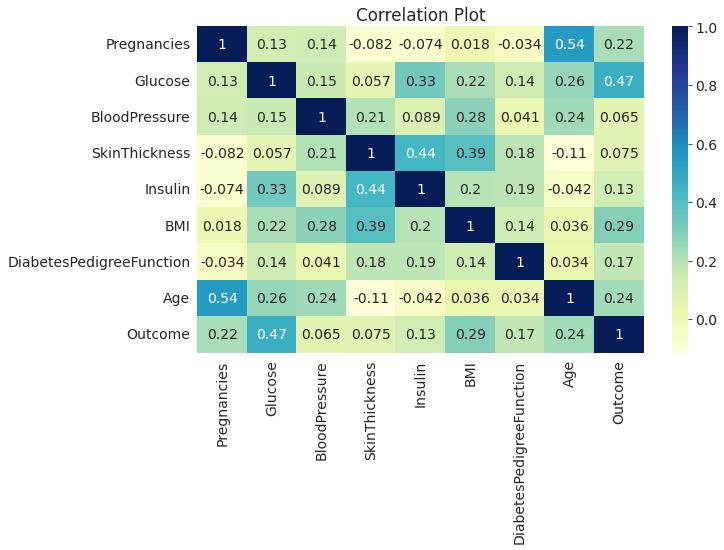

In [189]:
# Correlation using Heat Map
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.title('Correlation Plot')
plt.show()

# 3. Missing Value/Outliers Treatment

### Handling the columns contains zero

some columns contains value 0 ,it doest make sense

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- Pregnancies

We are imputing and NaN value in place f columns that contains zero,then impute the NaN with mean or median based on the distribution of that columns.

In [190]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [191]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Filling missing values based on their distribution 

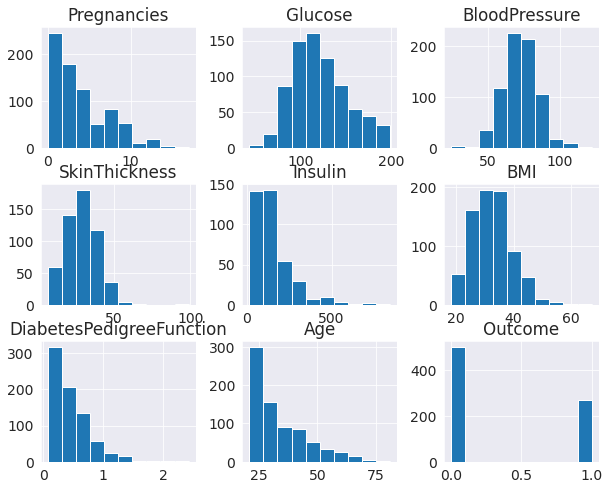

In [192]:
p = df.hist(figsize=(10,8))

In [193]:
df.Glucose.fillna(df.Glucose.mean(),inplace=True)
df.BloodPressure.fillna(df.BloodPressure.mean(),inplace=True)
df.SkinThickness.fillna(df.SkinThickness.median(),inplace=True)
df.Insulin.fillna(df.Insulin.median(),inplace=True)
df.BMI.fillna(df.BMI.median(),inplace=True)

In [194]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Handling Outlier values of all columns


Here we are capping the outlier values to upper fence and lower fence using the plotly interactive charts.

### Pregnancies

In [195]:
lst=[]
for idx,value in df.loc[df.Outcome==0,'Pregnancies'].iteritems():
  
  if value>11:
    lst.append(idx)
print(lst)

[28, 86, 274, 333, 358, 436, 518, 582, 744, 745]


In [196]:
for i in lst:
  df.loc[i,'Pregnancies']=11

### Glucose

In [197]:
lst_upper=[]
lst_lower=[]
for idx,value in df.loc[df.Outcome==0,'Glucose'].iteritems():
  if value>173:
    lst_upper.append(idx)
  elif value<56:
    lst_lower.append(idx)

print(lst_upper) 
print(lst_lower)

[40, 212, 228, 258, 260, 327, 489, 549, 622, 728]
[62]


In [198]:
for i in lst_upper:
  df.loc[i,'Glucose']=173
for j in lst_lower:
  df.loc[i,'Glucose']=56

### BloodPressure

In [199]:
lst_upper=[]
lst_lower=[]
for idx,value in df.loc[df.Outcome==0,'BloodPressure'].iteritems():
  if value>100:
    lst_upper.append(idx)
  elif value<38:
    lst_lower.append(idx)
print(lst_upper)
print(lst_lower)

[106, 362, 549, 658, 672]
[18, 597]


In [200]:
for i in lst_upper:
  df.loc[i,'BloodPressure']=100
for i in lst_lower:
  df.loc[i,'BloodPressure']=38  

In [201]:
lst_upper=[]
lst_lower=[]
for idx,value in df.loc[df.Outcome==1,'BloodPressure'].iteritems():
  if value>106:
    lst_upper.append(idx)
  elif value<48:
    lst_lower.append(idx)
print(lst_upper)
print(lst_lower) 

[43, 84, 177, 691]
[4, 125]


In [202]:
for i in lst_upper:
  df.loc[i,'BloodPressure']=106
for i in lst_lower:
  df.loc[i,'BloodPressure']=48 


### SkinThickness

In [203]:
lst=[]
for idx,value in df.loc[df.Outcome==1,'SkinThickness'].iteritems():
  
  if value>63:
    print(idx,value)
    lst.append(idx)
print(lst)   

579 99.0
[579]


In [204]:
for i in lst:
  df.loc[i,'SkinThickness']=63

### Insulin

In [205]:
lst=[]
for idx,value in df.loc[df.Outcome==0,'Insulin'].iteritems():
  
  if value>255:
    lst.append(idx)
print(lst) 

[54, 73, 139, 144, 153, 162, 228, 247, 248, 258, 279, 286, 364, 392, 395, 412, 486, 487, 519, 574, 608, 645, 679, 707, 710, 713]


In [206]:
for i in lst:
  df.loc[i,'Insulin']=255

### BMI

In [207]:
lst=[]
for idx,value in df.loc[df.Outcome==0,'BMI'].iteritems():
  
  if value>47.9:
    lst.append(idx)
print(lst)

[247, 673]


In [208]:
for i in lst:
  df.loc[i,'Insulin']=47.9

In [209]:
lst=[]
for idx,value in df.loc[df.Outcome==1,'BMI'].iteritems():
  
  if value>50:
    lst.append(idx)
print(lst)

[120, 125, 177, 193, 303, 445]


In [210]:
for i in lst:
  df.loc[i,'Insulin']=50

### DiabetesPedigreeFunction

In [211]:
lst=[]
for idx,value in df.loc[df.Outcome==0,'DiabetesPedigreeFunction'].iteritems():
  
  if value>1.022:
    lst.append(idx)
print(lst)

[12, 58, 147, 228, 267, 330, 371, 383, 395, 412, 416, 434, 487, 534, 593, 621, 622, 657, 744, 747]


In [212]:
for i in lst:
  df.loc[i,'DiabetesPedigreeFunction']=1.022

In [213]:
lst=[]
for idx,value in df.loc[df.Outcome==1,'DiabetesPedigreeFunction'].iteritems():
  
  if value>1.394:
    lst.append(idx)
print(lst)

[4, 45, 370, 445]


In [214]:
for i in lst:
  df.loc[i,'DiabetesPedigreeFunction']=1.394

### Age

In [215]:
lst=[]
for idx,value in df.loc[df.Outcome==0,'Age'].iteritems():
  
  if value>58:
    lst.append(idx)
print(lst)

[30, 123, 148, 212, 223, 263, 294, 361, 362, 453, 456, 459, 475, 479, 489, 495, 509, 519, 537, 552, 582, 674, 684, 763]


In [216]:
for i in lst:
  df.loc[i,'Age']=58

In [217]:
lst=[]
for idx,value in df.loc[df.Outcome==1,'Age'].iteritems():
  
  if value>67:
    lst.append(idx)
print(lst)

[666]


In [218]:
for i in lst:
  df.loc[i,'Age']=67

# 4. Prepare the Dataset for ML Training

## Input and target cols

In [219]:
input_cols = df.columns[:-1].tolist()

In [220]:
target_col = 'Outcome'

In [221]:
input_df = df[input_cols]

In [222]:
input_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,48.0,35.0,168.0,43.1,1.394,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,58
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [223]:
target = df[target_col]

In [224]:
target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Train test split

In [225]:
X,X_test,y,y_test= train_test_split(input_df,target,test_size=0.1,random_state=1)

In [226]:
print('X.shape',X.shape)
print('X_test.shape',X_test.shape)
print('y.shape',y.shape)
print('y_test.shape',y_test.shape)

X.shape (691, 8)
X_test.shape (77, 8)
y.shape (691,)
y_test.shape (77,)


In [227]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
69,4,146.0,85.0,27.0,100.0,28.9,0.189,27
382,1,109.0,60.0,8.0,182.0,25.4,0.947,21
195,5,158.0,84.0,41.0,210.0,39.4,0.395,29
84,5,137.0,106.0,29.0,125.0,48.8,0.227,37
442,4,117.0,64.0,27.0,120.0,33.2,0.230,24
...,...,...,...,...,...,...,...,...
645,2,157.0,74.0,35.0,255.0,39.4,0.134,30
715,7,187.0,50.0,33.0,392.0,33.9,0.826,34
72,13,126.0,90.0,29.0,125.0,43.4,0.583,42
235,4,171.0,72.0,29.0,125.0,43.6,0.479,26


## Scaling Down

In [228]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [229]:
X = pd.DataFrame(X,columns = input_cols)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.057337,0.815950,1.065042,-0.227047,-0.490232,-0.510451,-0.939680,-0.539492
1,-0.856960,-0.417995,-1.044927,-2.485308,0.640461,-1.022809,1.760012,-1.073318
2,0.362102,1.216149,0.980643,1.436934,1.026552,1.026623,-0.205990,-0.361550
3,0.362102,0.515801,2.837415,0.010664,-0.145508,2.402670,-0.804339,0.350219
4,0.057337,-0.151196,-0.707332,-0.227047,-0.214453,0.119017,-0.793654,-0.806405
...,...,...,...,...,...,...,...,...
686,-0.552195,1.182799,0.136656,0.723799,1.647054,1.026623,-1.135568,-0.272579
687,0.971633,2.183295,-1.888914,0.486088,3.536139,0.221489,1.329059,0.083306
688,2.800227,0.148952,1.487035,0.010664,-0.145508,1.612175,0.463590,0.795074
689,0.057337,1.649697,-0.032142,0.010664,-0.145508,1.641452,0.093184,-0.628463


In [230]:
X_test = pd.DataFrame(X_test,columns=input_cols)
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.971633,0.482451,0.136656,-0.345903,-0.007619,-0.934977,0.691533,1.595814
1,-0.856960,0.982699,-1.044927,0.010664,-0.145508,-0.920338,-0.975296,-0.984347
2,0.666868,-0.417995,-1.044927,-0.227047,-0.145508,-1.081365,-0.879133,-0.539492
3,-0.247429,-2.018790,0.811845,-0.108191,-0.145508,0.294683,-0.747353,1.150959
4,-0.856960,-0.184546,0.474251,0.010664,0.612884,0.543542,0.153731,-0.717434
...,...,...,...,...,...,...,...,...
72,0.057337,-0.117847,-0.200939,0.010664,-0.145508,1.773202,1.606864,-0.628463
73,-0.552195,-2.185539,-1.382521,-0.108191,-1.248624,-1.198475,-0.430371,-0.984347
74,1.276399,1.082749,0.474251,0.367232,-0.145508,0.001907,-0.035034,1.061988
75,1.581164,-0.084497,0.643048,0.723799,-0.145508,-0.495813,-0.676121,-0.361550


# 5. Train & Evaluate Hardcoded & Baseline Models

Always create a simple hardcoded or baseline model to establish the minimum score any proper ML model should beat.

## Hard coded models

We are creating two hard coded models which randomly produce outputs and other one always produce zero. Ideally our other models should beat these dump models otherwise our models will also be useless.

In [231]:
def random_guess(inputs):
  return np.random.choice([0,1],len(inputs))

In [232]:
def all_zero(inputs):
  return np.full(len(inputs),0)

Lets check the accuracy of test set on this dump models.

In [233]:
accuracy_score(y_test,random_guess(X_test))

0.5454545454545454

In [234]:
accuracy_score(y_test,all_zero(X_test))

0.6233766233766234

Ideally models we create should break the accuracy of above dump and random model.

## Baseline Model

We are creating a Logistic Regression baseline model.Our all other trained model should beat this hard coded and baseline models.

In [235]:
base_model = LogisticRegression()
base_model.fit(X,y)
train_score = base_model.score(X,y)
test_score = base_model.score(X_test,y_test)
print(train_score,test_score)

0.7771345875542692 0.7792207792207793


# 6. Train & Evaluate Different Models

Here we train and evaluate different models with some random manual hyperparameter tuning.

## Logistic Model

In [236]:
lr_model = LogisticRegression(n_jobs=-1,
                              random_state=42,
                              )
lr_model.fit(X,y)

LogisticRegression(n_jobs=-1, random_state=42)

Lets define a helper function which gives us a confusion matrix heat map

In [237]:
def predict_and_plot(model,inputs,targets,name=''):
  preds = model.predict(inputs)

  accuracy = accuracy_score(targets,preds)
  print("Accuracy : {:.2f}%".format(accuracy * 100))

  cf = confusion_matrix(targets,preds,normalize='true')
  plt.figure()
  sns.heatmap(cf,annot=True,cmap='Blues')
  plt.xlabel('Prediction')
  plt.ylabel('Actual')
  plt.title('{} Confusion Matrix'.format(name))

  return preds


Accuracy : 77.71%


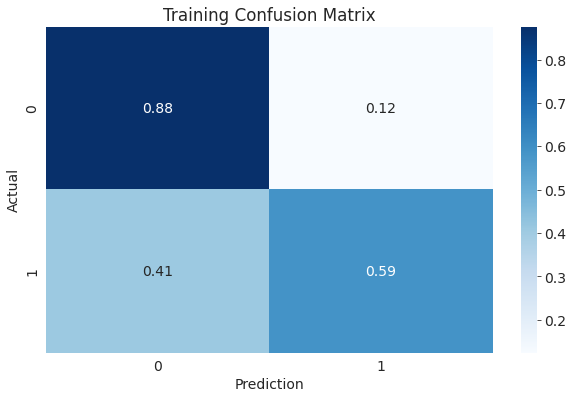

In [238]:
train_preds = predict_and_plot(lr_model,X,y,'Training')

Accuracy : 77.92%


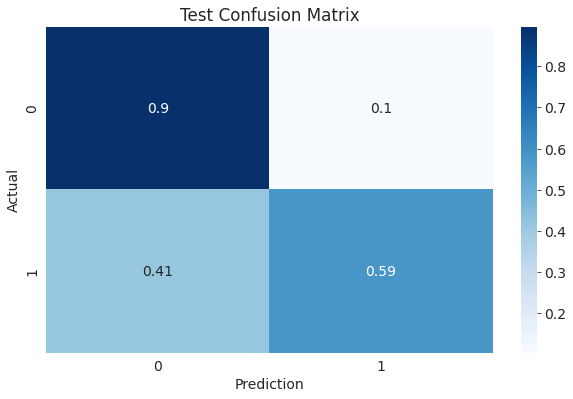

In [239]:
test_preds = predict_and_plot(lr_model,X_test,y_test,'Test')

In [240]:
#clasification report of test
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83        48
           1       0.77      0.59      0.67        29

    accuracy                           0.78        77
   macro avg       0.78      0.74      0.75        77
weighted avg       0.78      0.78      0.77        77



## Decision Tree Classifier

In [241]:
dt_model = DecisionTreeClassifier(random_state=42,
                                  max_depth=2)

In [242]:
dt_model.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [243]:
dt_model.score(X,y)

0.7351664254703328

In [244]:
dt_model.score(X_test,y_test)

0.7532467532467533

Accuracy : 73.52%


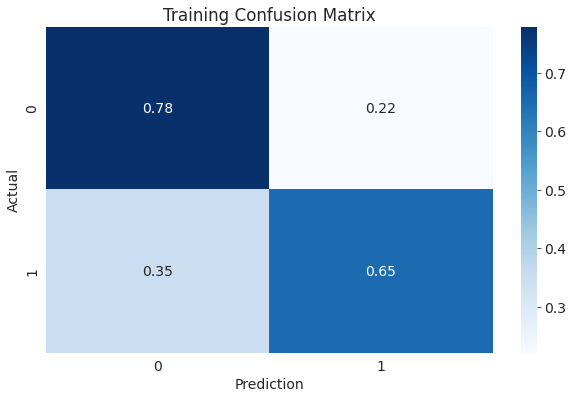

In [245]:
train_preds = predict_and_plot(dt_model,X,y,'Training')

Accuracy : 75.32%


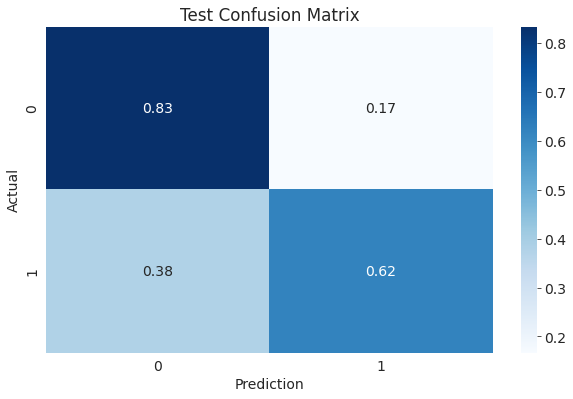

In [246]:
test_preds = predict_and_plot(dt_model,X_test,y_test,'Test')

In [247]:
#classification report of test
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        48
           1       0.69      0.62      0.65        29

    accuracy                           0.75        77
   macro avg       0.74      0.73      0.73        77
weighted avg       0.75      0.75      0.75        77



## RandomForestClassifier

In [248]:
rf_model = RandomForestClassifier(random_state=42,
                                  n_jobs=-1,
                                  n_estimators=5,
                                  max_depth=4)

In [249]:
rf_model.fit(X,y)

RandomForestClassifier(max_depth=4, n_estimators=5, n_jobs=-1, random_state=42)

Accuracy : 80.03%


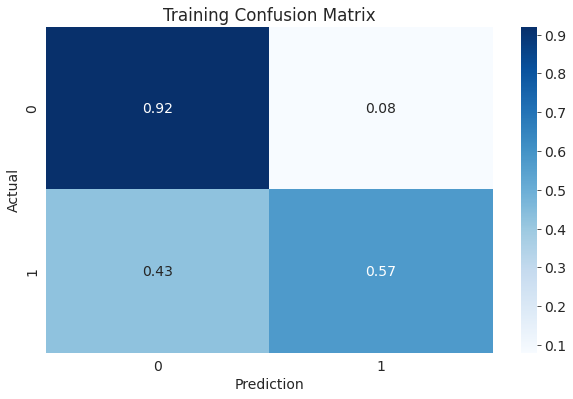

In [250]:
train_preds = predict_and_plot(rf_model,X,y,'Training')


Accuracy : 81.82%


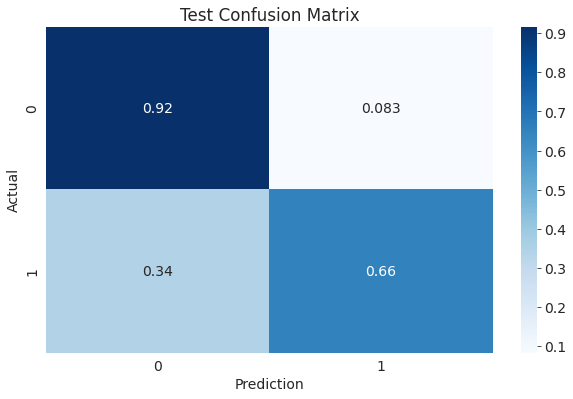

In [251]:
test_preds = predict_and_plot(rf_model,X_test,y_test,'Test')

In [252]:
#classification report of test
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        48
           1       0.83      0.66      0.73        29

    accuracy                           0.82        77
   macro avg       0.82      0.79      0.80        77
weighted avg       0.82      0.82      0.81        77



## XGBClassifier

In [253]:
xg_model = XGBClassifier(random_state=42,
                         n_jobs=-1,
                         n_estimators=85)

In [254]:
xg_model.fit(X,y)

XGBClassifier(n_estimators=85, n_jobs=-1, random_state=42)

In [255]:

xg_model.score(X,y)

0.8755426917510853

In [256]:
xg_model.score(X_test,y_test)

0.8441558441558441

Accuracy : 87.55%


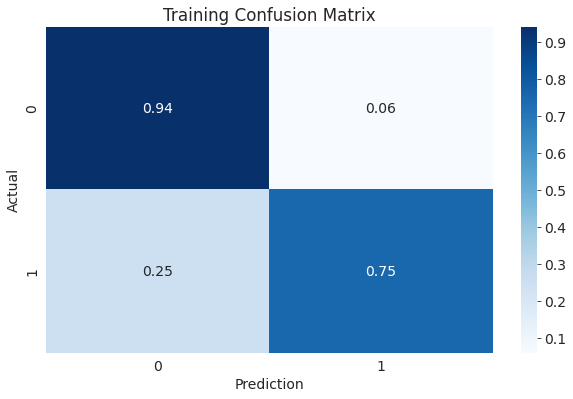

In [257]:
train_preds = predict_and_plot(xg_model,X,y,'Training')


Accuracy : 84.42%


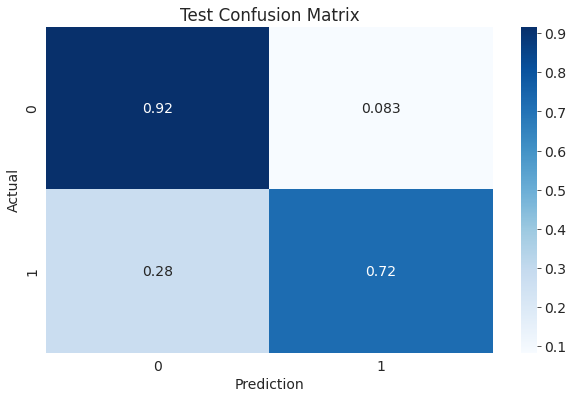

In [258]:
test_preds = predict_and_plot(xg_model,X_test,y_test,'Test')

In [259]:
#classification report of test
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        48
           1       0.84      0.72      0.78        29

    accuracy                           0.84        77
   macro avg       0.84      0.82      0.83        77
weighted avg       0.84      0.84      0.84        77



## LGBM Classifier

In [260]:
lgbm_model = lgbm.LGBMClassifier(random_state=42,
                                 num_leaves=2,
                                 num_iterations=84)

In [261]:
lgbm_model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



LGBMClassifier(num_iterations=84, num_leaves=2, random_state=42)

In [262]:

lgbm_model.score(X,y)

0.7930535455861071

In [263]:
lgbm_model.score(X_test,y_test)

0.8181818181818182

Accuracy : 79.31%


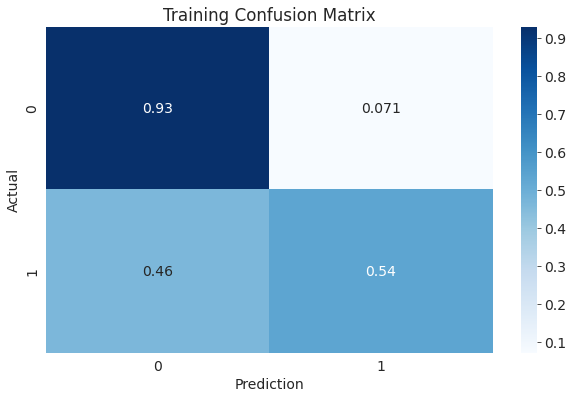

In [264]:
train_preds = predict_and_plot(lgbm_model,X,y,'Training')

Accuracy : 81.82%


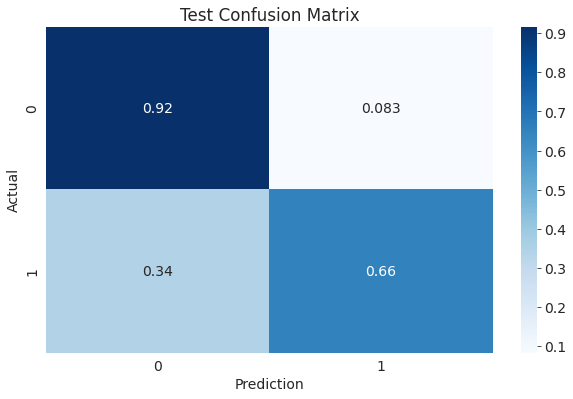

In [265]:
test_preds = predict_and_plot(lgbm_model,X_test,y_test,'Test')

In [266]:
#classification report of test
print(classification_report(test_preds,y_test))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        54
           1       0.66      0.83      0.73        23

    accuracy                           0.82        77
   macro avg       0.79      0.82      0.80        77
weighted avg       0.84      0.82      0.82        77



## Catboost 

In [267]:
cat_model = CatBoostClassifier(iterations=62)

In [268]:
cat_model.fit(X,y)

Learning rate set to 0.11266
0:	learn: 0.6608872	total: 1.5ms	remaining: 91.3ms
1:	learn: 0.6367171	total: 2.99ms	remaining: 89.8ms
2:	learn: 0.6175841	total: 4.52ms	remaining: 88.9ms
3:	learn: 0.5986819	total: 5.91ms	remaining: 85.7ms
4:	learn: 0.5821256	total: 7.4ms	remaining: 84.3ms
5:	learn: 0.5654235	total: 8.91ms	remaining: 83.2ms
6:	learn: 0.5536578	total: 10.4ms	remaining: 81.9ms
7:	learn: 0.5428162	total: 12ms	remaining: 80.8ms
8:	learn: 0.5320830	total: 13.4ms	remaining: 79ms
9:	learn: 0.5234038	total: 14.9ms	remaining: 77.6ms
10:	learn: 0.5141096	total: 16.4ms	remaining: 76ms
11:	learn: 0.5078412	total: 17.9ms	remaining: 74.4ms
12:	learn: 0.5007113	total: 19.3ms	remaining: 72.9ms
13:	learn: 0.4929465	total: 20.8ms	remaining: 71.1ms
14:	learn: 0.4871605	total: 22.2ms	remaining: 69.6ms
15:	learn: 0.4800684	total: 23.7ms	remaining: 68.3ms
16:	learn: 0.4753751	total: 25.2ms	remaining: 66.8ms
17:	learn: 0.4703112	total: 26.7ms	remaining: 65.2ms
18:	learn: 0.4660036	total: 28ms	re

In [269]:
cat_model.score(X,y)

0.8263386396526773

In [270]:
cat_model.score(X_test,y_test)

0.8311688311688312

Accuracy : 82.63%


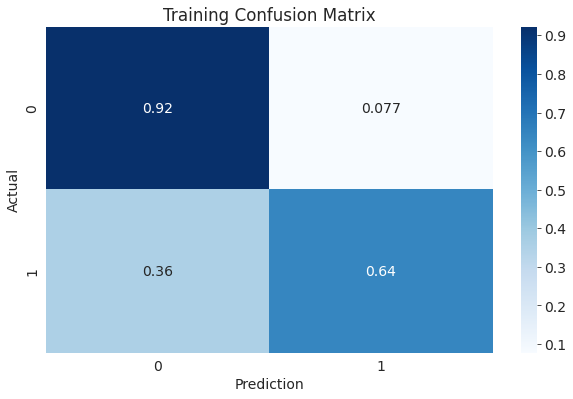

In [271]:
train_preds = predict_and_plot(cat_model,X,y,'Training')

Accuracy : 83.12%


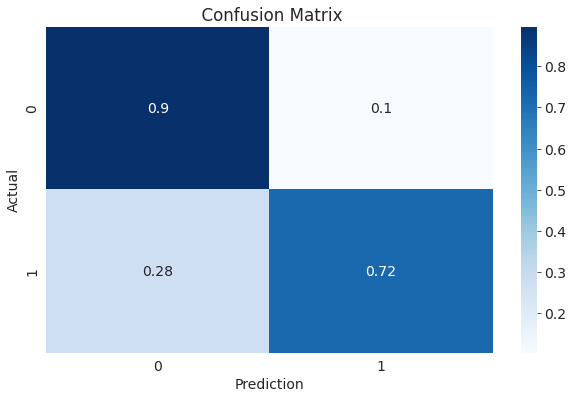

In [272]:
test_preds = predict_and_plot(cat_model,X_test,y_test)

In [273]:
#classification report of test
print(classification_report(test_preds,y_test))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        51
           1       0.72      0.81      0.76        26

    accuracy                           0.83        77
   macro avg       0.81      0.83      0.82        77
weighted avg       0.84      0.83      0.83        77



## SVC

In [274]:
svc_model = SVC(C=5,random_state=42,probability=True)

In [275]:
svc_model.fit(X,y)

SVC(C=5, probability=True, random_state=42)

In [276]:
svc_model.score(X,y)

0.849493487698987

In [277]:
svc_model.score(X_test,y_test)

0.8181818181818182

Accuracy : 84.95%


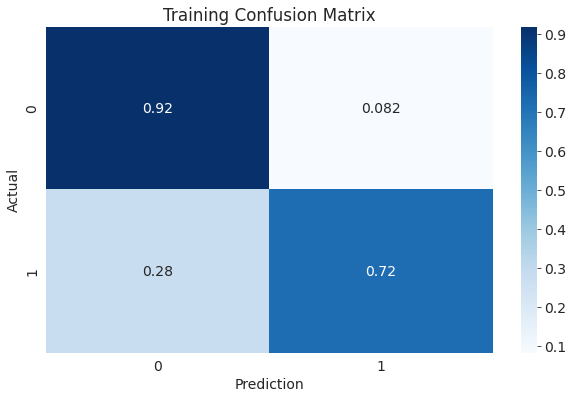

In [278]:
train_preds = predict_and_plot(svc_model,X,y,'Training')

Accuracy : 81.82%


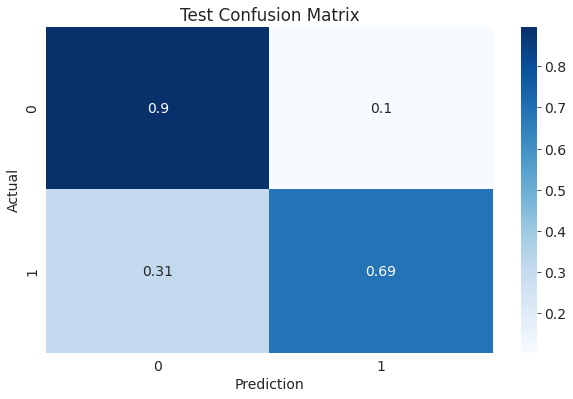

In [279]:
test_preds = predict_and_plot(svc_model,X_test,y_test,'Test')

In [280]:
#classification report of test
print(classification_report(test_preds,y_test))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        52
           1       0.69      0.80      0.74        25

    accuracy                           0.82        77
   macro avg       0.79      0.81      0.80        77
weighted avg       0.83      0.82      0.82        77



## KNN

In [281]:
knn_model = KNeighborsClassifier(n_jobs=-1)

In [282]:
knn_model.fit(X,y)

KNeighborsClassifier(n_jobs=-1)

In [283]:

knn_model.score(X,y)

0.8306801736613604

In [284]:
knn_model.score(X_test,y_test)

0.8311688311688312

Accuracy : 83.07%


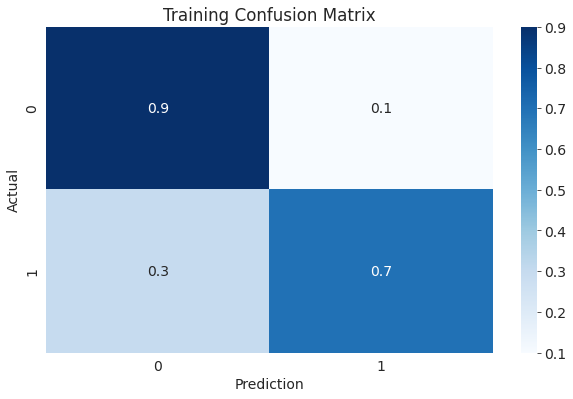

In [285]:
train_preds = predict_and_plot(knn_model,X,y,'Training')

Accuracy : 83.12%


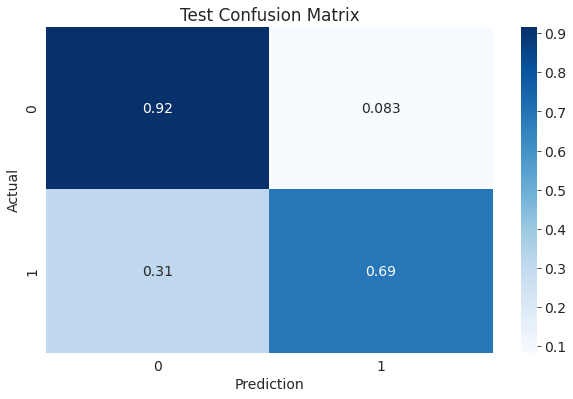

In [286]:
test_preds = predict_and_plot(knn_model,X_test,y_test,'Test')

In [287]:
#classification report of test
print(classification_report(test_preds,y_test))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        53
           1       0.69      0.83      0.75        24

    accuracy                           0.83        77
   macro avg       0.80      0.83      0.81        77
weighted avg       0.85      0.83      0.83        77



## Adaboost

In [288]:
ada_model = AdaBoostClassifier(n_estimators=45,
                               random_state=42)

In [289]:
ada_model.fit(X,y)

AdaBoostClassifier(n_estimators=45, random_state=42)

In [290]:
ada_model.score(X,y)

0.85383502170767

In [291]:
ada_model.score(X_test,y_test)

0.8441558441558441

Accuracy : 85.38%


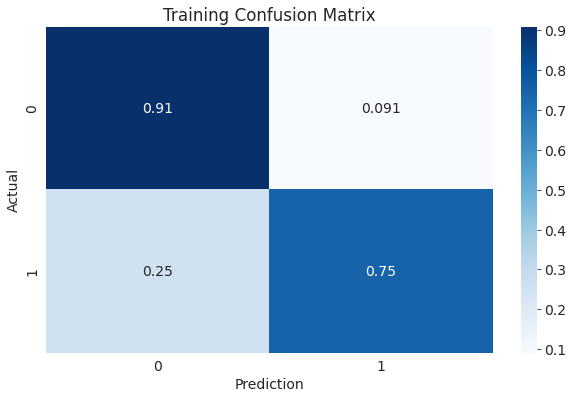

In [292]:
train_preds = predict_and_plot(ada_model,X,y,'Training')



Accuracy : 84.42%


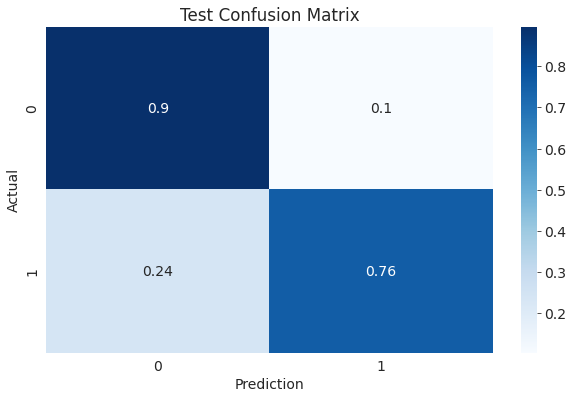

In [293]:
test_preds = predict_and_plot(ada_model,X_test,y_test,'Test')

In [294]:
#classification report of test
print(classification_report(test_preds,y_test))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        50
           1       0.76      0.81      0.79        27

    accuracy                           0.84        77
   macro avg       0.83      0.84      0.83        77
weighted avg       0.85      0.84      0.85        77



## Stacking Classifier

In [295]:
#get a stacking esemble of models

#define the base models 
level0 = list()

level0.append(('xg',XGBClassifier(random_state=42,
                         n_jobs=-1,
                         n_estimators=85)))

level0.append(('cat',CatBoostClassifier(iterations=62)))

level0.append(('lgbm',lgbm.LGBMClassifier(random_state=42,
                                 num_leaves=2,
                                 num_iterations=84)))

level0.append(('ada',AdaBoostClassifier()))

level0.append(('knn',KNeighborsClassifier(n_jobs=-1)))



#define meta learner model
level1 = LogisticRegression()
#define stacking ensemble
stacking_model = StackingClassifier(estimators=level0,final_estimator=level1)

stacking_model.fit(X,y)


Learning rate set to 0.11266
0:	learn: 0.6608872	total: 3.67ms	remaining: 224ms
1:	learn: 0.6367171	total: 5.61ms	remaining: 168ms
2:	learn: 0.6175841	total: 6.97ms	remaining: 137ms
3:	learn: 0.5986819	total: 8.27ms	remaining: 120ms
4:	learn: 0.5821256	total: 9.61ms	remaining: 110ms
5:	learn: 0.5654235	total: 11.1ms	remaining: 103ms
6:	learn: 0.5536578	total: 12.8ms	remaining: 100ms
7:	learn: 0.5428162	total: 14.2ms	remaining: 95.6ms
8:	learn: 0.5320830	total: 15.6ms	remaining: 91.6ms
9:	learn: 0.5234038	total: 16.9ms	remaining: 88.1ms
10:	learn: 0.5141096	total: 18.3ms	remaining: 84.6ms
11:	learn: 0.5078412	total: 19.6ms	remaining: 81.8ms
12:	learn: 0.5007113	total: 21ms	remaining: 79ms
13:	learn: 0.4929465	total: 22.5ms	remaining: 77.2ms
14:	learn: 0.4871605	total: 24ms	remaining: 75.1ms
15:	learn: 0.4800684	total: 25.3ms	remaining: 72.7ms
16:	learn: 0.4753751	total: 26.6ms	remaining: 70.5ms
17:	learn: 0.4703112	total: 28ms	remaining: 68.3ms
18:	learn: 0.4660036	total: 29.3ms	remaini

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



Learning rate set to 0.102357
0:	learn: 0.6662250	total: 1.34ms	remaining: 81.8ms
1:	learn: 0.6467813	total: 2.7ms	remaining: 80.9ms
2:	learn: 0.6280430	total: 6.53ms	remaining: 128ms
3:	learn: 0.6109865	total: 8.88ms	remaining: 129ms
4:	learn: 0.5963819	total: 10.3ms	remaining: 117ms
5:	learn: 0.5836726	total: 11.6ms	remaining: 108ms
6:	learn: 0.5707702	total: 12.9ms	remaining: 102ms
7:	learn: 0.5607540	total: 14.3ms	remaining: 96.2ms
8:	learn: 0.5497001	total: 15.7ms	remaining: 92.2ms
9:	learn: 0.5402147	total: 17ms	remaining: 88.5ms
10:	learn: 0.5309162	total: 18.4ms	remaining: 85.3ms
11:	learn: 0.5243228	total: 19.7ms	remaining: 82.2ms
12:	learn: 0.5161940	total: 21ms	remaining: 79.2ms
13:	learn: 0.5082498	total: 22ms	remaining: 75.4ms
14:	learn: 0.5023342	total: 23.4ms	remaining: 73.2ms
15:	learn: 0.4944493	total: 24.8ms	remaining: 71.2ms
16:	learn: 0.4891419	total: 26.3ms	remaining: 69.6ms
17:	learn: 0.4840040	total: 27.7ms	remaining: 67.6ms
18:	learn: 0.4789014	total: 29.1ms	rem

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



StackingClassifier(estimators=[('xg',
                                XGBClassifier(n_estimators=85, n_jobs=-1,
                                              random_state=42)),
                               ('cat',
                                <catboost.core.CatBoostClassifier object at 0x7f2b7c09ac10>),
                               ('lgbm',
                                LGBMClassifier(num_iterations=84, num_leaves=2,
                                               random_state=42)),
                               ('ada', AdaBoostClassifier()),
                               ('knn', KNeighborsClassifier(n_jobs=-1))],
                   final_estimator=LogisticRegression())

In [296]:
stacking_model.score(X,y)

0.8610709117221418

In [297]:
stacking_model.score(X_test,y_test)

0.8311688311688312

Accuracy : 86.11%


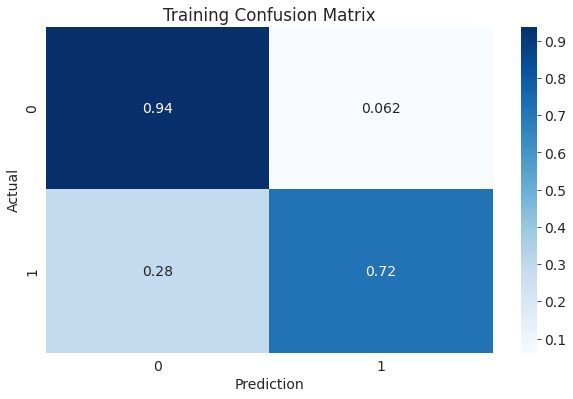

In [298]:
train_preds = predict_and_plot(stacking_model,X,y,'Training')

Accuracy : 83.12%


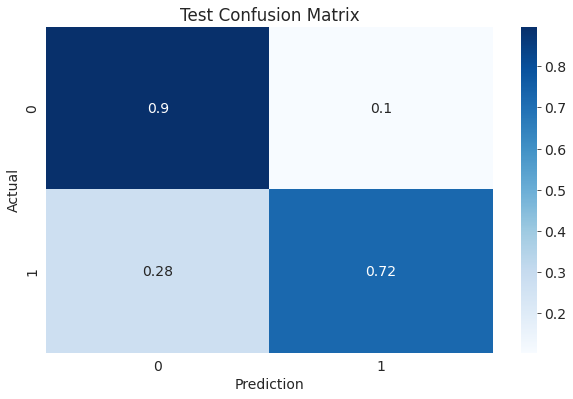

In [299]:
test_preds  = predict_and_plot(stacking_model,X_test,y_test,'Test')

In [300]:
#classification report of test
print(classification_report(test_preds,y_test))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        51
           1       0.72      0.81      0.76        26

    accuracy                           0.83        77
   macro avg       0.81      0.83      0.82        77
weighted avg       0.84      0.83      0.83        77



## Voting Classifier

In [301]:
xg_clf = XGBClassifier(random_state=42,
                         n_jobs=-1,
                         n_estimators=85)

ada_clf = AdaBoostClassifier(n_estimators=45,
                               random_state=42)

knn_clf = KNeighborsClassifier()

lgbm_clf = lgbm.LGBMClassifier(random_state=42,
                                 num_leaves=2,
                                 num_iterations=84)

cat_clf = CatBoostClassifier(iterations=50)


voting_model = VotingClassifier(estimators=[('xg',xg_clf),
                                            ('ada',ada_clf),
                                            ('knn',knn_clf),
                                            ('lgbm',lgbm_clf),
                                            ('cat',cat_clf)],voting='soft')
voting_model.fit(X,y)


Learning rate set to 0.137226
0:	learn: 0.6542614	total: 2.69ms	remaining: 132ms
1:	learn: 0.6261964	total: 5.15ms	remaining: 124ms
2:	learn: 0.6040067	total: 6.45ms	remaining: 101ms
3:	learn: 0.5838706	total: 9.13ms	remaining: 105ms
4:	learn: 0.5659437	total: 11.2ms	remaining: 100ms
5:	learn: 0.5491282	total: 12.5ms	remaining: 91.5ms
6:	learn: 0.5378740	total: 14ms	remaining: 85.7ms
7:	learn: 0.5279206	total: 15.2ms	remaining: 79.9ms
8:	learn: 0.5169072	total: 16.4ms	remaining: 74.8ms
9:	learn: 0.5073463	total: 17.7ms	remaining: 70.8ms
10:	learn: 0.4986946	total: 19.2ms	remaining: 68.1ms
11:	learn: 0.4915493	total: 20.3ms	remaining: 64.2ms
12:	learn: 0.4843377	total: 21.2ms	remaining: 60.4ms
13:	learn: 0.4793687	total: 22.2ms	remaining: 57.1ms
14:	learn: 0.4724824	total: 23.4ms	remaining: 54.6ms
15:	learn: 0.4651531	total: 24.6ms	remaining: 52.3ms
16:	learn: 0.4607882	total: 25.8ms	remaining: 50ms
17:	learn: 0.4558852	total: 27ms	remaining: 48ms
18:	learn: 0.4514533	total: 28.3ms	rema

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



VotingClassifier(estimators=[('xg',
                              XGBClassifier(n_estimators=85, n_jobs=-1,
                                            random_state=42)),
                             ('ada',
                              AdaBoostClassifier(n_estimators=45,
                                                 random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('lgbm',
                              LGBMClassifier(num_iterations=84, num_leaves=2,
                                             random_state=42)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7f2b7fad7210>)],
                 voting='soft')

In [302]:
voting_model.score(X,y)

0.8523878437047757

In [303]:
voting_model.score(X_test,y_test)

0.8441558441558441

Accuracy : 85.24%


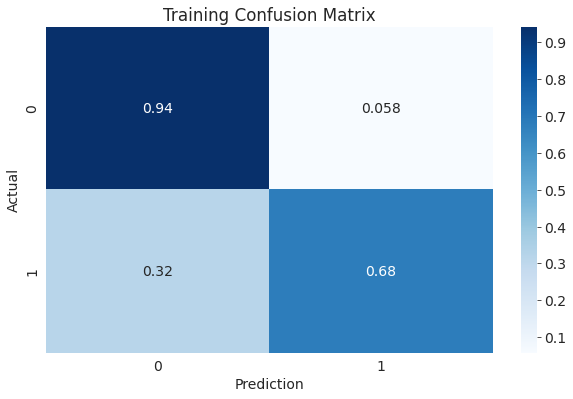

In [304]:
train_preds = predict_and_plot(voting_model,X,y,'Training')

Accuracy : 84.42%


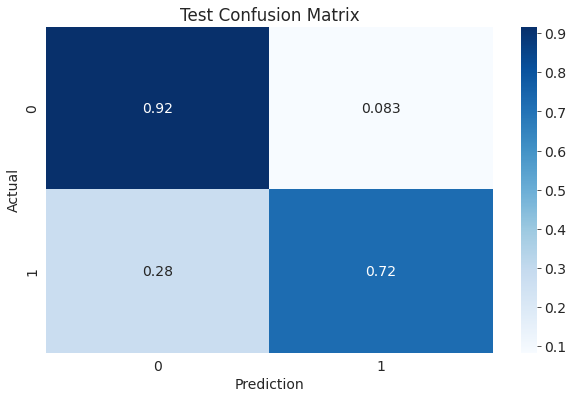

In [305]:
test_preds = predict_and_plot(voting_model,X_test,y_test,'Test')

In [306]:
#classification report of test
print(classification_report(test_preds,y_test))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        52
           1       0.72      0.84      0.78        25

    accuracy                           0.84        77
   macro avg       0.82      0.84      0.83        77
weighted avg       0.85      0.84      0.85        77



Out of all models we have found that XGBoost model gives us a Training accuracy of 87.26 and Test accuracy of 85.26  which is highest among other model .

# 7. Hyperparameter tuning with GridSearchCV

In [307]:
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression()
df_clf= DecisionTreeClassifier()
rf_clf= RandomForestClassifier()
adboost_clf= AdaBoostClassifier()
grad_clf=GradientBoostingClassifier()
svc_clf=SVC()

clf_list=[lr_clf,df_clf,rf_clf,adboost_clf,grad_clf,svc_clf]

grid_params_lr= [{'penalty':['l1','l2'],'solver':['saga']}]

grid_params_df =[{'criterion':["gini","entropy"], 'splitter':['best','random'],'max_depth':[3,4,5],'min_samples_split':[2,3,4],'max_features':["auto","sqrt","log2"]}]

grid_params_rf=[{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt','auto'], 'criterion': ['entropy', 'gini'],'max_depth': [2, 3, 5, 10]}]

grid_params_adboost=[{'n_estimators':[10,50,250,1000],'learning_rate':[0.01,0.1],}]

grid_params_grad=[{'loss':['deviance', 'exponential'],'learning_rate':[1,7,9],'criterion':['friedman_mse','squared_error']}]

grid_params_svc=[{'kernel':['linear','poly','rbf'],'degree':[3,4,5]}]




clf_params=[grid_params_lr,grid_params_df,grid_params_rf,grid_params_adboost,grid_params_grad,grid_params_svc]

In [ ]:
for clf,clf_param in zip(clf_list,clf_params):
  print(f"The Classifier is {clf} and its hyper params are {clf_param}")

  grid_clf = GridSearchCV(estimator=clf,param_grid=clf_param,scoring="accuracy",cv=10)
  grid_clf.fit(X,y)
  
  print(f"The Train accuracy for the {clf} is {grid_clf.score(X,y)}")

  print(f"The Test accuracy for the {clf} is {grid_clf.score(X,y)}")

  print(f"The Best param for the {clf} is {grid_clf.best_params_}")
  print("====================\n")

The Classifier is LogisticRegression() and its hyper params are [{'penalty': ['l1', 'l2'], 'solver': ['saga']}]
The Train accuracy for the LogisticRegression() is 0.7800289435600579
The Test accuracy for the LogisticRegression() is 0.7800289435600579
The Best param for the LogisticRegression() is {'penalty': 'l1', 'solver': 'saga'}

The Classifier is DecisionTreeClassifier() and its hyper params are [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2']}]
The Train accuracy for the DecisionTreeClassifier() is 0.7800289435600579
The Test accuracy for the DecisionTreeClassifier() is 0.7800289435600579
The Best param for the DecisionTreeClassifier() is {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'splitter': 'best'}

The Classifier is RandomForestClassifier() and its hyper params are [{'n_estimators': [4, 6, 9], 'max_features': ['log2', 

# Saving the best Trained Model

We are taking the Adaboost model as our best model.

In [ ]:
xg_model = XGBClassifier(random_state=42,
                         n_jobs=-1,
                         n_estimators=85)
xg_model.fit(X,y)

In [ ]:
import joblib
joblib.dump(xg_model,'model.pkl')

In [ ]:
#joblib.dump()

In [ ]:
joblib.dump(scaler,'scaler.pkl')

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=45,
                               random_state=42)

In [ ]:
joblib.dump(ada_model,'ada_model.pkl')

# Conclusions

Considering this work, the key messages and conclusion of this work could be summarised as follows:

1. The project result shows Adaboost,Voting Classifier and XGboost shows the higher accuracy on the training and test datasets.

2. Adaboost was recorded 85.38% on training set and 84.42% on test set,while Voting classifier recorded 85.24% on training and 84.42% on test and xgboost recorded 87.5% and 84.4% on test dataset.

3. We have manually tuned some hyper parameters and alse used gridsearchCv also.

4. We have also calucalated the Precision,recall anf F1 score ..which let us to choose the model.



# References

- Dataset : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/download?datasetVersionNumber=1

- Machine Learning with Python:Zero to GBMs

- Opendatasets library
